# **2020**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving mlb-odds-2020.csv to mlb-odds-2020.csv
Saving mlb-odds-2021.csv to mlb-odds-2021.csv


In [67]:
import pandas as pd
for filename in uploaded.keys():
    df = pd.read_csv('mlb-odds-2020.csv', sep = ';')
    df1 = pd.read_csv('mlb-odds-2021.csv', sep = ';')

print(df.head())


    Date VH Team  1st  2nd  3rd  4th  5th  6th 7th 8th 9th  Final Model 1  \
0  723.0  V  NYY  2.0  0.0  1.0  0.0  1.0  0.0   x   x   x    4.0    -126   
1  723.0  H  WAS  1.0  0.0  0.0  0.0  0.0  0.0   x   x   x    1.0     114   
2  723.0  V  SFO  0.0  0.0  1.0  0.0  0.0  0.0   0   0   0    1.0     264   
3  723.0  H  LAD  0.0  0.0  0.0  1.0  0.0  0.0   5   2   0    8.0    -300   
4  724.0  V  ATL  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0    0.0     110   

   Model 2  
0   -170.0  
1    160.0  
2    250.0  
3   -290.0  
4    157.0  


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def american_to_european_odds(odds):
  if odds > 0:
    return 1 + (odds/100)
  else:
    return 1 + (100/abs(odds))

print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())


Date       2
VH         2
Team       2
1st        2
2nd        2
3rd        2
4th        2
5th        2
6th        2
7th        2
8th        2
9th        2
Final      2
Model 1    2
Model 2    2
dtype: int64
Date       0
VH         0
Team       0
1st        0
2nd        0
3rd        0
4th        0
5th        0
6th        0
7th        0
8th        0
9th        0
Final      0
Model 1    0
Model 2    0
dtype: int64


In [69]:
df[['Final' ,'Model 1', 'Model 2']] = df[['Final' ,'Model 1', 'Model 2']].apply(pd.to_numeric, errors = 'coerce')
df.dropna(inplace=True)
df['odds1'] = df['Model 1'].apply(american_to_european_odds)
df['odds2'] = df['Model 2'].apply(american_to_european_odds)

df.head(5)

,Date,VH,Team,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,Final,Model 1,Model 2,odds1,odds2
0,723.0,V,NYY,2.0,0.0,1.0,0.0,1.0,0.0,x,x,x,4.0,-126.0,-170.0,1.793651,1.588235
1,723.0,H,WAS,1.0,0.0,0.0,0.0,0.0,0.0,x,x,x,1.0,114.0,160.0,2.140000,2.600000
2,723.0,V,SFO,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1.0,264.0,250.0,3.640000,3.500000
3,723.0,H,LAD,0.0,0.0,0.0,1.0,0.0,0.0,5,2,0,8.0,-300.0,-290.0,1.333333,1.344828
4,724.0,V,ATL,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,110.0,157.0,2.100000,2.570000


In [70]:
correct_predictions_1 = 0
correct_predictions_2 = 0
net_profit_model_1 = 0
net_profit_model_2 = 0
net_profit_model_1_list = []
net_profit_model_2_list = []
bet = 1
roi_model_1 = []
roi_model_2 = []

for i in range (0, len(df),2):
  visitor = df.iloc[i]
  home = df.iloc[i+1]
  roi_model_1.append((100/visitor['odds1'])+(100/home['odds1']))
  roi_model_2.append((100/visitor['odds2'])+(100/home['odds2']))



  if visitor['Final'] > home['Final']:
    winner = visitor['Team']
  else:
    winner = home['Team']

  if visitor['odds1'] < home['odds1']:
    predicted_winner1 = visitor['Team']
    betting_odd1 = visitor['odds1']
  else:
    predicted_winner1 = home['Team']
    betting_odd1 = home['odds1']


  if visitor['odds2'] < home['odds2']:
    predicted_winner2 = visitor['Team']
    betting_odd2 = visitor['odds2']
  else:
    predicted_winner2 = home['Team']
    betting_odd2 = home['odds2']


  if winner == predicted_winner1:
    correct_predictions_1 += 1
    net_profit_model_1 += (betting_odd1-1) * bet
  else:
    net_profit_model_1 -= bet
  if winner == predicted_winner2:
    correct_predictions_2 += 1
    net_profit_model_2 += (betting_odd2-1) * bet
  else:
    net_profit_model_2 -= bet

  # print(net_profit_model_2)
  net_profit_model_1_list.append(net_profit_model_1)
  net_profit_model_2_list.append(net_profit_model_2)

print('The total correct predictions of model 1 is: ',correct_predictions_1)
print('The total correct predictions of model 2 is: ',correct_predictions_2)
print(f'success model 1 is: {round(100*correct_predictions_1/(len(df)/2),2)}%')
print(f'success model 2 is: {round(100*correct_predictions_2/(len(df)/2),2)}%')
print(f'net profit model 1 is: {round(net_profit_model_1,2)}')
print(f'net profit model 2 is: {round(net_profit_model_2,2)}')

The total correct predictions of model 1 is:  541
The total correct predictions of model 2 is:  561
success model 1 is: 57.19%
success model 2 is: 59.3%
net profit model 1 is: -52.63
net profit model 2 is: -10.54


In [71]:
len(roi_model_1)
len(roi_model_2)

946

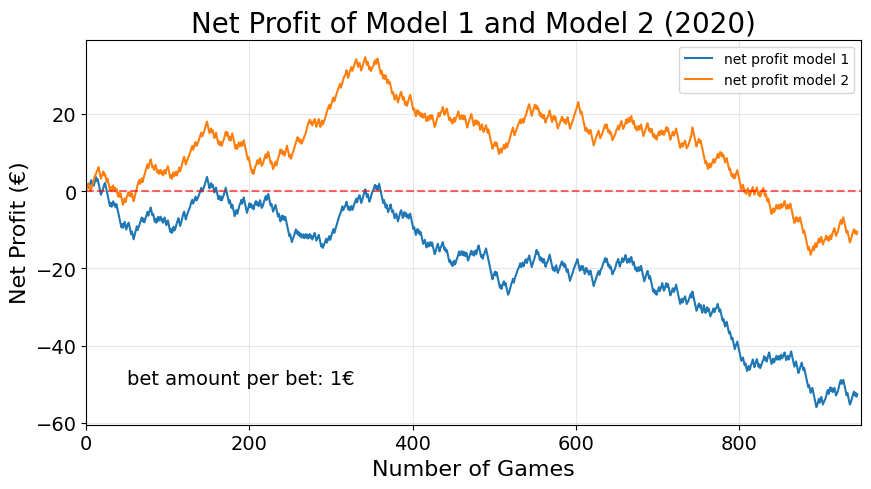

In [74]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

plt.plot(net_profit_model_1_list, label = 'net profit model 1')
plt.plot(net_profit_model_2_list, label = 'net profit model 2')
plt.axhline(y=0, color='r', linestyle='--', alpha = 0.6)
plt.xlabel('Number of Games', fontsize = 16)
plt.ylabel('Net Profit (€)', fontsize = 16)
plt.title('Net Profit of Model 1 and Model 2 (2020)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.3)
plt.text(x = 50, y = -50, s = 'bet amount per bet: 1€', fontsize = 14)
plt.xlim(0,950)
plt.legend()

plt.show()


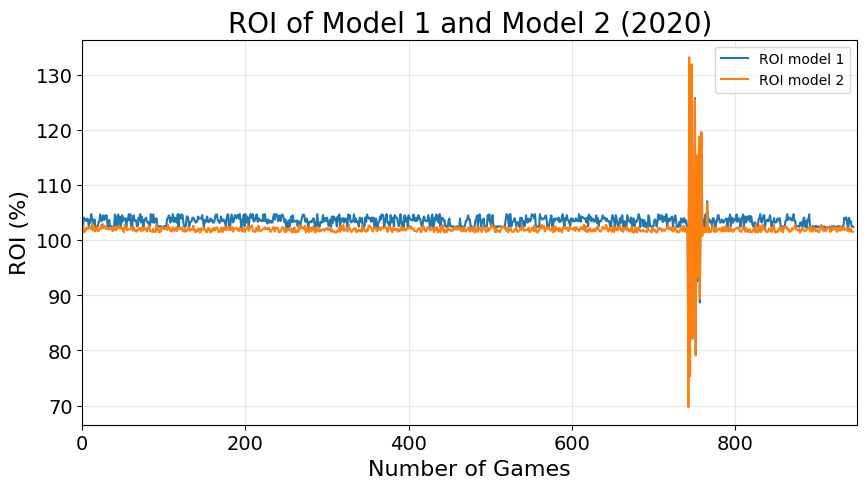

In [76]:
fig = plt.figure(figsize=(10,5))

plt.plot(roi_model_1, label = 'ROI model 1')
plt.plot(roi_model_2, label = 'ROI model 2')
# plt.axhline(y=0, color='r', linestyle='--', alpha = 0.6)
plt.xlabel('Number of Games', fontsize = 16)
plt.ylabel('ROI (%)', fontsize = 16)
plt.title('ROI of Model 1 and Model 2 (2020)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.3)
# plt.text(x = 50, y = 100, s = 'bet amount per bet: 1€', fontsize = 14)
plt.xlim(0,950)
plt.legend()

plt.show()

In [75]:
df.iloc[1482:1520] #wrong betting odds

,Date,VH,Team,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,Final,Model 1,Model 2,odds1,odds2
1488,917.0,V,BAL,0.0,0.0,2.0,4.0,0.0,0.0,0,x,x,6.0,157.0,161.0,2.570000,2.610000
1489,917.0,H,TAM,3.0,0.0,1.0,2.0,4.0,0.0,0,x,x,10.0,-175.0,-172.0,1.571429,1.581395
1490,917.0,V,BOS,0.0,0.0,0.0,0.0,0.0,2.0,3,0,0,5.0,114.0,-108.0,2.140000,1.925926
1491,917.0,H,MIA,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,3.0,-126.0,-102.0,1.793651,1.980392
1492,918.0,V,TOR,0.0,0.0,0.0,5.0,2.0,0.0,0,x,x,7.0,170.0,200.0,2.700000,3.000000
1493,918.0,H,PHI,1.0,0.0,1.0,3.0,0.0,3.0,x,x,x,8.0,157.0,175.0,2.570000,2.750000
1494,918.0,V,TAM,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,2.0,-175.0,-190.0,1.571429,1.526316
1495,918.0,H,BAL,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1.0,-181.0,-210.0,1.552486,1.476190
1496,918.0,V,STL,1.0,2.0,2.0,1.0,0.0,0.0,0,x,x,6.0,156.0,190.0,2.560000,2.900000
1497,918.0,H,PIT,2.0,0.0,0.0,3.0,0.0,0.0,0,x,x,5.0,126.0,145.0,2.260000,2.450000


Mean value of model 1: 103.47 ± 0.76
Mean value of model 2: 102.01 ± 0.41


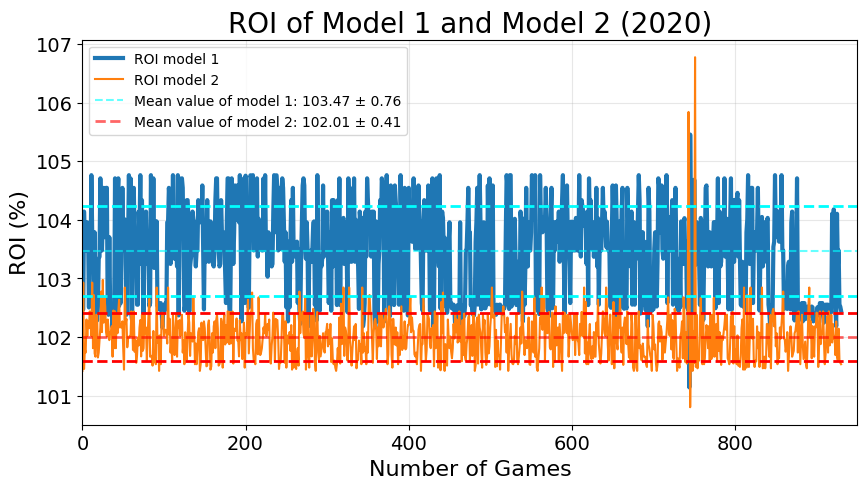

In [77]:
import numpy as np

filtered_roi_model_1 = [roi_model_1[x] for x in range(len(roi_model_1)) if (roi_model_1[x] < 107) and (roi_model_1[x] > 100)]
filtered_roi_model_2 = [roi_model_2[x] for x in range(len(roi_model_2)) if (roi_model_2[x] < 107) and (roi_model_2[x] > 100)]
fig = plt.figure(figsize=(10,5))
mean_model_1 = np.mean(filtered_roi_model_1)
mean_model_2 = np.mean(filtered_roi_model_2)
std_model_1 = np.std(filtered_roi_model_1)
std_model_2 = np.std(filtered_roi_model_2)
print(f'Mean value of model 1: {round(mean_model_1,2)} ± {round(std_model_1,2)}')
print(f'Mean value of model 2: {round(mean_model_2,2)} ± {round(std_model_2,2)}')

plt.plot(filtered_roi_model_1, label = 'ROI model 1', linewidth = 3)
plt.plot(filtered_roi_model_2, label = 'ROI model 2', )

plt.axhline(y=mean_model_1, color='cyan', linestyle='--', alpha = 0.6, label = f'Mean value of model 1: {round(mean_model_1,2)} ± {round(std_model_1,2)}')
plt.axhline(y=mean_model_1 + std_model_1, color='cyan', linestyle='--', alpha = 1, linewidth = 2)
plt.axhline(y=mean_model_1 - std_model_1, color='cyan', linestyle='--', alpha = 1, linewidth = 2)
plt.axhline(y=mean_model_2, color='red', linestyle='--', alpha = 0.6, linewidth = 2, label = f'Mean value of model 2: {round(mean_model_2,2)} ± {round(std_model_2,2)}')
plt.axhline(y=mean_model_2 + std_model_2, color='red', linestyle='--', alpha = 1, linewidth = 2)
plt.axhline(y=mean_model_2 - std_model_2, color='red', linestyle='--', alpha = 1, linewidth = 2)
plt.xlabel('Number of Games', fontsize = 16)
plt.ylabel('ROI (%)', fontsize = 16)
plt.title('ROI of Model 1 and Model 2 (2020)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.3)
# plt.text(x = 50, y = 100, s = 'bet amount per bet: 1€', fontsize = 14)
plt.xlim(0,950)
plt.legend()

plt.show()

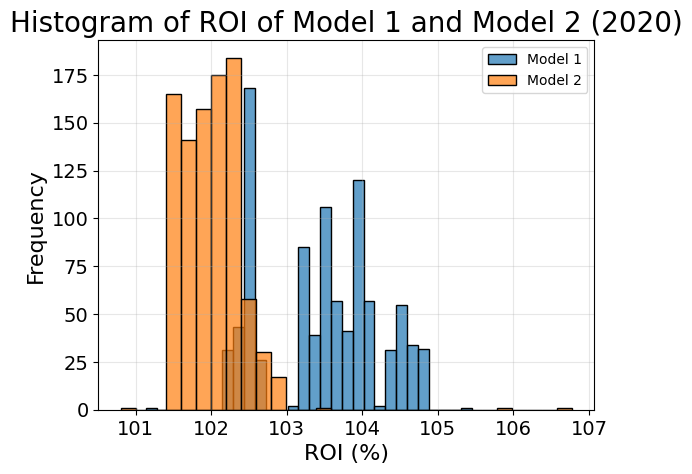

In [78]:
sns.histplot(filtered_roi_model_1, bins = 30, edgecolor = 'black', alpha = 0.7, label = 'Model 1')
sns.histplot(filtered_roi_model_2, bins = 30, edgecolor = 'black', alpha = 0.7, label = 'Model 2')
plt.xlabel('ROI (%)', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Histogram of ROI of Model 1 and Model 2 (2020)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

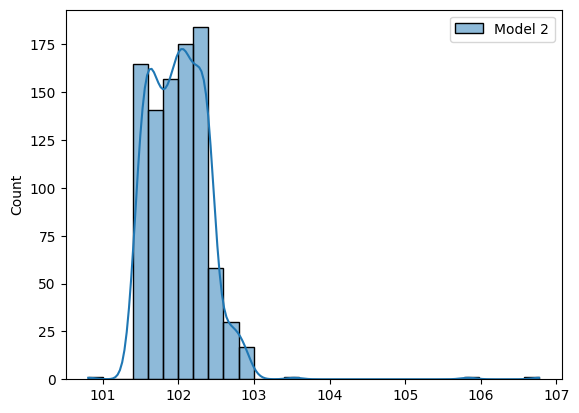

In [79]:
sns.histplot(filtered_roi_model_2, bins = 30, kde = True, label = 'Model 2')

plt.legend()
plt.show()

In [80]:
false_odd_model_1 = len(filtered_roi_model_1)/len(roi_model_1)
false_odd_model_2 = len(filtered_roi_model_2)/len(roi_model_2)
print('The percentage of model 1 with false odds is: ', round(100-false_odd_model_1*100,2),'%')
print('The percentage of model 2 with false odds is: ', round(100-false_odd_model_2*100,2),'%')

The percentage of model 1 with false odds is:  1.59 %
The percentage of model 2 with false odds is:  1.59 %


In [81]:
part_filtered_roi_model_1 = [roi_model_1[x] for x in range(int(len(roi_model_1)/10)) if (roi_model_1[x] < 107) and (roi_model_1[x] > 100)]
part_filtered_roi_model_2 = [roi_model_2[x] for x in range(int(len(roi_model_2)/10)) if (roi_model_2[x] < 107) and (roi_model_2[x] > 100)]

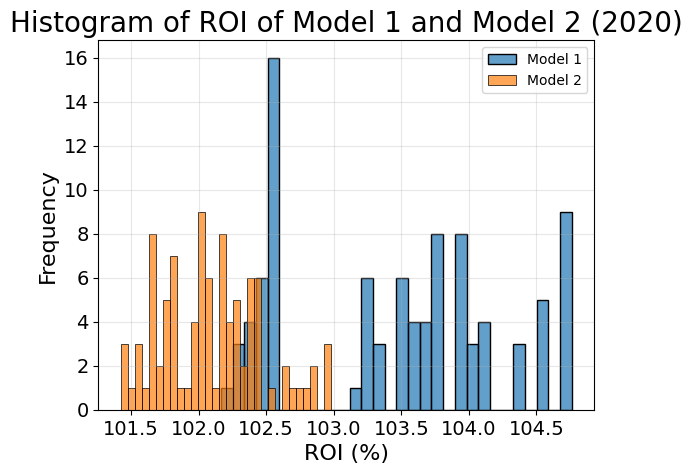

In [82]:
sns.histplot(part_filtered_roi_model_1, bins = 30, edgecolor = 'black', alpha = 0.7, label = 'Model 1')
sns.histplot(part_filtered_roi_model_2, bins = 30, edgecolor = 'black', alpha = 0.7, label = 'Model 2')
plt.xlabel('ROI (%)', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Histogram of ROI of Model 1 and Model 2 (2020)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

# **2021**

In [83]:
print(df1.isnull().sum())
df1.dropna(inplace=True)
print(df1.isnull().sum())
df1[['Final' ,'Model 1', 'Model 2']] = df1[['Final' ,'Model 1', 'Model 2']].apply(pd.to_numeric, errors = 'coerce')
df1.dropna(inplace=True)
df1['odds1'] = df1['Model 1'].apply(american_to_european_odds)
df1['odds2'] = df1['Model 2'].apply(american_to_european_odds)

df1.head(5)

Date       0
VH         0
Team       0
1st        0
2nd        0
3rd        0
4th        0
5th        0
6th        0
7th        0
8th        0
9th        0
Final      0
Model 1    0
Model 2    0
dtype: int64
Date       0
VH         0
Team       0
1st        0
2nd        0
3rd        0
4th        0
5th        0
6th        0
7th        0
8th        0
9th        0
Final      0
Model 1    0
Model 2    0
dtype: int64


,Date,VH,Team,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,Final,Model 1,Model 2,odds1,odds2
0,401,V,PIT,2,1,0,0,1,0,1,0,0,5,183,190,2.830000,2.900000
1,401,H,CUB,1,0,1,0,0,0,0,1,0,3,-205,-210,1.487805,1.476190
2,401,V,ATL,0,0,0,0,0,0,2,0,0,2,-105,117,1.952381,2.170000
3,401,H,PHI,1,0,1,0,0,0,0,0,0,3,-105,-127,1.952381,1.787402
4,401,V,ARI,1,0,0,0,6,0,0,0,0,7,188,205,2.880000,3.050000


In [84]:
correct_predictions_1 = 0
correct_predictions_2 = 0
net_profit_model_1 = 0
net_profit_model_2 = 0
net_profit_model_1_list = []
net_profit_model_2_list = []
bet = 1
roi_model_1 = []
roi_model_2 = []

for i in range (0, len(df1),2):
  visitor = df1.iloc[i]
  home = df1.iloc[i+1]
  roi_model_1.append((100/visitor['odds1'])+(100/home['odds1']))
  roi_model_2.append((100/visitor['odds2'])+(100/home['odds2']))



  if visitor['Final'] > home['Final']:
    winner = visitor['Team']
  else:
    winner = home['Team']

  if visitor['odds1'] < home['odds1']:
    predicted_winner1 = visitor['Team']
    betting_odd1 = visitor['odds1']
  else:
    predicted_winner1 = home['Team']
    betting_odd1 = home['odds1']


  if visitor['odds2'] < home['odds2']:
    predicted_winner2 = visitor['Team']
    betting_odd2 = visitor['odds2']
  else:
    predicted_winner2 = home['Team']
    betting_odd2 = home['odds2']


  if winner == predicted_winner1:
    correct_predictions_1 += 1
    net_profit_model_1 += (betting_odd1-1) * bet
  else:
    net_profit_model_1 -= bet
  if winner == predicted_winner2:
    correct_predictions_2 += 1
    net_profit_model_2 += (betting_odd2-1) * bet
  else:
    net_profit_model_2 -= bet

  # print(net_profit_model_2)
  net_profit_model_1_list.append(net_profit_model_1)
  net_profit_model_2_list.append(net_profit_model_2)

print('The total correct predictions of model 1 is: ',correct_predictions_1)
print('The total correct predictions of model 2 is: ',correct_predictions_2)
print(f'success model 1 is: {round(100*correct_predictions_1/(len(df1)/2),2)}%')
print(f'success model 2 is: {round(100*correct_predictions_2/(len(df1)/2),2)}%')
print(f'net profit model 1 is: {round(net_profit_model_1,2)}')
print(f'net profit model 2 is: {round(net_profit_model_2,2)}')

The total correct predictions of model 1 is:  1448
The total correct predictions of model 2 is:  1454
success model 1 is: 58.81%
success model 2 is: 59.06%
net profit model 1 is: -79.36
net profit model 2 is: -39.02


In [85]:
len(roi_model_1)
len(roi_model_2)

2462

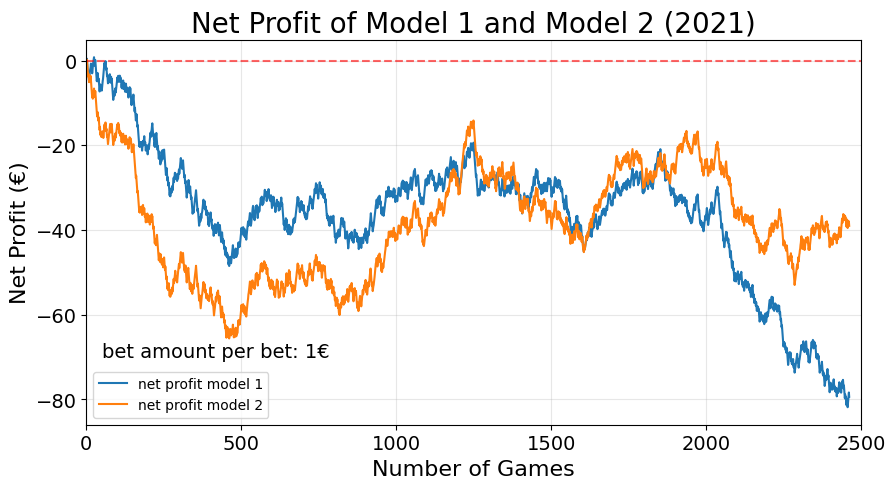

In [86]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

plt.plot(net_profit_model_1_list, label = 'net profit model 1')
plt.plot(net_profit_model_2_list, label = 'net profit model 2')
plt.axhline(y=0, color='r', linestyle='--', alpha = 0.6)
plt.xlabel('Number of Games', fontsize = 16)
plt.ylabel('Net Profit (€)', fontsize = 16)
plt.title('Net Profit of Model 1 and Model 2 (2021)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.3)
plt.text(x = 50, y = -70, s = 'bet amount per bet: 1€', fontsize = 14)
plt.xlim(0,2500)
plt.legend()

plt.show()


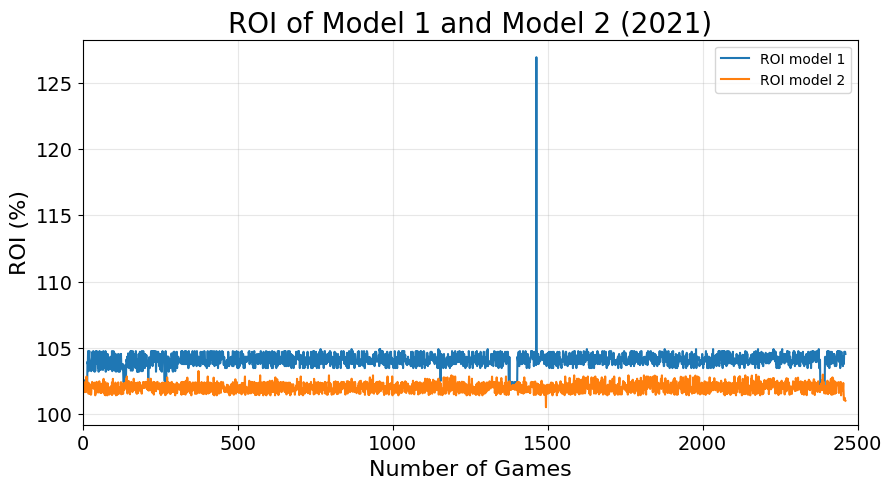

In [87]:
fig = plt.figure(figsize=(10,5))

plt.plot(roi_model_1, label = 'ROI model 1')
plt.plot(roi_model_2, label = 'ROI model 2')
# plt.axhline(y=0, color='r', linestyle='--', alpha = 0.6)
plt.xlabel('Number of Games', fontsize = 16)
plt.ylabel('ROI (%)', fontsize = 16)
plt.title('ROI of Model 1 and Model 2 (2021)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.3)
# plt.text(x = 50, y = 100, s = 'bet amount per bet: 1€', fontsize = 14)
plt.xlim(0,2500)
# plt.ylim(101,107)
plt.legend()

plt.show()

Mean value of model 1: 104.07 ± 0.5
Mean value of model 2: 102.03 ± 0.35


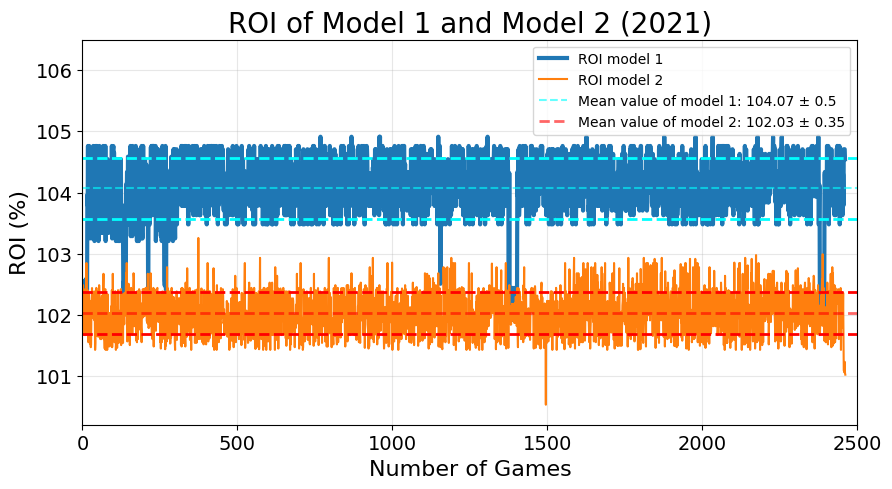

In [88]:
import numpy as np

filtered_roi_model_1 = [roi_model_1[x] for x in range(len(roi_model_1)) if (roi_model_1[x] < 107) and (roi_model_1[x] > 100)]
filtered_roi_model_2 = [roi_model_2[x] for x in range(len(roi_model_2)) if (roi_model_2[x] < 107) and (roi_model_2[x] > 100)]
fig = plt.figure(figsize=(10,5))
mean_model_1 = np.mean(filtered_roi_model_1)
mean_model_2 = np.mean(filtered_roi_model_2)
std_model_1 = np.std(filtered_roi_model_1)
std_model_2 = np.std(filtered_roi_model_2)
print(f'Mean value of model 1: {round(mean_model_1,2)} ± {round(std_model_1,2)}')
print(f'Mean value of model 2: {round(mean_model_2,2)} ± {round(std_model_2,2)}')

plt.plot(filtered_roi_model_1, label = 'ROI model 1', linewidth = 3)
plt.plot(filtered_roi_model_2, label = 'ROI model 2', )

plt.axhline(y=mean_model_1, color='cyan', linestyle='--', alpha = 0.6, label = f'Mean value of model 1: {round(mean_model_1,2)} ± {round(std_model_1,2)}')
plt.axhline(y=mean_model_1 + std_model_1, color='cyan', linestyle='--', alpha = 1, linewidth = 2)
plt.axhline(y=mean_model_1 - std_model_1, color='cyan', linestyle='--', alpha = 1, linewidth = 2)
plt.axhline(y=mean_model_2, color='red', linestyle='--', alpha = 0.6, linewidth = 2, label = f'Mean value of model 2: {round(mean_model_2,2)} ± {round(std_model_2,2)}')
plt.axhline(y=mean_model_2 + std_model_2, color='red', linestyle='--', alpha = 1, linewidth = 2)
plt.axhline(y=mean_model_2 - std_model_2, color='red', linestyle='--', alpha = 1, linewidth = 2)
plt.xlabel('Number of Games', fontsize = 16)
plt.ylabel('ROI (%)', fontsize = 16)
plt.title('ROI of Model 1 and Model 2 (2021)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.3)
# plt.text(x = 50, y = 100, s = 'bet amount per bet: 1€', fontsize = 14)
plt.xlim(0,2500)
plt.ylim(100.2,106.5)
plt.legend()

plt.show()

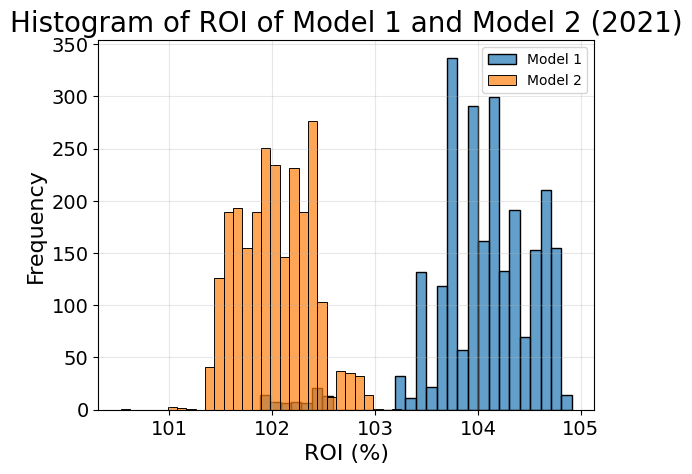

In [89]:
sns.histplot(filtered_roi_model_1, bins = 30, edgecolor = 'black', alpha = 0.7, label = 'Model 1')
sns.histplot(filtered_roi_model_2, bins = 30, edgecolor = 'black', alpha = 0.7, label = 'Model 2')
plt.xlabel('ROI (%)', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Histogram of ROI of Model 1 and Model 2 (2021)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

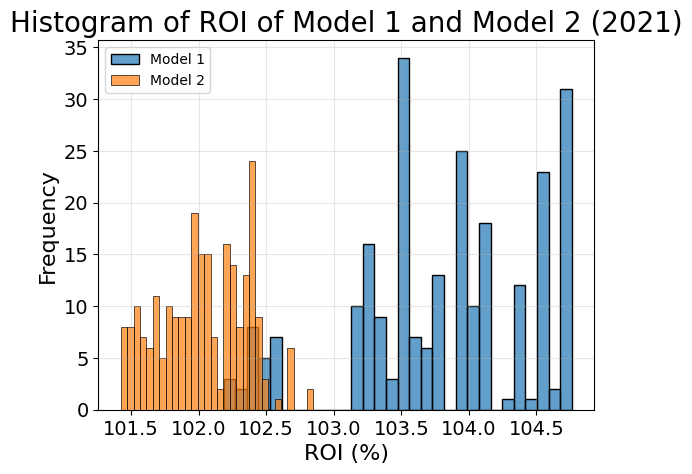

In [90]:
part_filtered_roi_model_1 = [roi_model_1[x] for x in range(int(len(roi_model_1)/10)) if (roi_model_1[x] < 107) and (roi_model_1[x] > 100)]
part_filtered_roi_model_2 = [roi_model_2[x] for x in range(int(len(roi_model_2)/10)) if (roi_model_2[x] < 107) and (roi_model_2[x] > 100)]
sns.histplot(part_filtered_roi_model_1, bins = 30, edgecolor = 'black', alpha = 0.7, label = 'Model 1')
sns.histplot(part_filtered_roi_model_2, bins = 30, edgecolor = 'black', alpha = 0.7, label = 'Model 2')
plt.xlabel('ROI (%)', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Histogram of ROI of Model 1 and Model 2 (2021)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

In [91]:
false_odd_model_1 = len(filtered_roi_model_1)/len(roi_model_1)
false_odd_model_2 = len(filtered_roi_model_2)/len(roi_model_2)
print('The percentage of model 1 with false odds is: ', round(100-false_odd_model_1*100,2),'%')
print('The percentage of model 2 with false odds is: ', round(100-false_odd_model_2*100,2),'%')

The percentage of model 1 with false odds is:  0.04 %
The percentage of model 2 with false odds is:  0.0 %


In [55]:
len(roi_model_1)
len(roi_model_2)

2462